# Домашнее задание 2. Нейронные сети
## Фамилия Имя Группа

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

A. [Набор данных](https://www.kaggle.com/aungpyaeap/fish-market) Таблица `Fish.csv`. Задача: построить модель, предсказывающую вес рыбы (колонка `Weight`). Baseline: RMSE (root mean square error) = 83.7

B. [Набор данных](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) Таблица `Car details v3.csv`. Задача: построить модель, предсказывающую стоимость автомобиля (колонка `selling_price`). Baseline: RMSE (root mean square error) = 110000

C. [Набор данных](https://www.kaggle.com/quantbruce/real-estate-price-prediction) Таблица `Real estate.csv`. Задача: построить модель, предсказывающую стоимость квадратного метра жилья (колонка `Y house price of unit area`). Baseline: RMSE (root mean square error) = 8

D. [Набор данных](https://www.kaggle.com/mirichoi0218/insurance) Таблица `insurance.csv`. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка `charges`). Baseline: RMSE (root mean square error) = 5800

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8


---

**Задача классификации**

K. [Набор данных](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) Таблица `train.csv`. Задача: детектировать токсичные комментарии (0 или 1 в колонке `toxic`) исключительно по содержимому комментария (колонка `comment_text`). Baseline: sklearn.metrics.f1_score(average='macro') по колонке `toxic` = 0.86

L. [Набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) Таблица `WA_Fn-UseC_-HR-Employee-Attrition.csv`. Задача: предсказать увольнение сотрудника (колонка `attrition`). Baseline: sklearn.metrics.f1_score(average='macro') = 0.70

M. [Набор данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Таблица `spam.csv` (при загрузку датасета в питоне использовать кодировку encoding='latin-1'). Задача: детектировать, является ли СМС-сообщение спамом. Baseline: sklearn.metrics.f1_score(average='macro') = 0.95

N. [Набор данных](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Таблица `diabetes.csv`. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

O. [Набор данных](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) Таблица `healthcare-dataset-stroke-data.csv`. Задача: детектировать, был ли у человека инсульт. Baseline: sklearn.metrics.f1_score(average='macro') = 0.56


# 0. Инициализация библиотек

In [1]:
import pandas as pd
import numpy as np
import math

import torch
from torch import nn
from torch.nn import functional as F

import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, f1_score
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction import text
import string
import nltk
stop = text.ENGLISH_STOP_WORDS
# nltk.download('punkt')


from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
pd.options.mode.chained_assignment = None

# 1. Искусственная неронная сеть для решения задачи регрессии (9 баллов)

## 1.1 Загрузка данных

In [2]:
BASELINE = 110000
data = pd.read_csv('./data/Car details v3.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## 1.2 Преодбработка/нормализация данных

In [3]:
data = data.dropna()

def convert_to_float(x):
    res = ''.join(re.findall('[0-9.]+', x))
    return float(res)

def transformColumn(value):
    values, indexes = pd.factorize(data[value], sort=True)
    return values

def parse_torque(torque):
    if '/' in torque:
        return None
    torque_split = torque.split(' ')

    temp_split = torque_split[0].split('(')
    torque_nm = convert_to_float(temp_split[0])
    if torque_nm < 50:
        torque_nm *= 9.807

    if torque_split.__len__() == 2 or torque_split.__len__() == 3:
        reg_res = re.findall('[-~]', torque_split[1])
        if reg_res:
            temp_split = torque_split[1].split(reg_res[0])
            torque_rmp = (convert_to_float(temp_split[0]) + convert_to_float(temp_split[1])) / 2
        else:
            torque_rmp = convert_to_float(torque_split[1])
    elif torque_split.__len__() == 4:
        if 'at' in torque:
            pos = 2 if torque_split[1] == 'at' else 3
            reg_res = re.findall('[-~]', torque_split[pos])
            if reg_res:
                temp_split = torque_split[pos].split(reg_res[0])
                torque_rmp = (convert_to_float(temp_split[0]) + convert_to_float(temp_split[1])) / 2
            else:
                torque_rmp = convert_to_float(torque_split[pos])
        else:
            return None
    else:
        return None
    if torque_rmp > 5000:
        return None
        
    power = torque_nm * torque_rmp / 9.5488
    return power

# Переведем все подходящие колонки в численные значения
term = lambda x:float(''.join(re.findall('[0-9.]+', x)))
data['engine'] = data['engine'].apply(convert_to_float)
data['max_power'] = data['max_power'].apply(convert_to_float)
data['mileage'] = data['mileage'].apply(convert_to_float)
# Крутящий момент преобразуем в мощность (по формуле: крутящий момент [Nm] * обороты [rmp] / 9.5488) для точности данных
# Для этого распарсим столбец, получим крутящий момент и обороты, подставим их в формулу.
data['torque'] = data['torque'].apply(parse_torque)
data = data.dropna()

data['fuel'] = transformColumn('fuel')
data['seller_type'] = transformColumn('seller_type')
data['transmission'] = transformColumn('transmission')
data['owner'] = transformColumn('owner')

# Название машин не должно влиять на обучение
data = data.drop(columns='name', axis=1)

quantile = np.quantile(data['selling_price'], 0.70)
data = data[data['selling_price']<=quantile]

quantile = np.quantile(data['torque'], 0.70)
data = data[data['torque']<=quantile]

quantile = np.quantile(data['km_driven'], 0.70)
data = data[data['km_driven']<=quantile]

print(data.info())
print(data.shape)
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2769 entries, 5 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           2769 non-null   int64  
 1   selling_price  2769 non-null   int64  
 2   km_driven      2769 non-null   int64  
 3   fuel           2769 non-null   int64  
 4   seller_type    2769 non-null   int64  
 5   transmission   2769 non-null   int64  
 6   owner          2769 non-null   int64  
 7   mileage        2769 non-null   float64
 8   engine         2769 non-null   float64
 9   max_power      2769 non-null   float64
 10  torque         2769 non-null   float64
 11  seats          2769 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 281.2 KB
None
(2769, 12)


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5,2017,440000,45000,3,1,1,0,20.14,1197.0,81.86,47649.966488,5.0
7,2001,45000,5000,3,1,1,2,16.10,796.0,37.00,15446.967158,4.0
8,2011,350000,90000,1,1,1,0,23.59,1364.0,67.10,37386.896783,5.0
14,2009,180000,90000,3,1,1,2,18.90,1061.0,67.00,30789.209115,5.0
15,2016,400000,40000,3,1,1,0,18.15,1198.0,82.00,42754.063338,5.0


## 1.3 Деление на train и test

In [4]:
prices = data['selling_price']
features = pd.get_dummies(data.drop(columns='selling_price', axis=1)).to_numpy()
x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.1, random_state=12)

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
x_train.head()

(2492, 11) (2492,) (277, 11) (277,)


,0,1,2,3,4,5,6,7,8,9,10
0,2008.0,87540.0,2.0,1.0,1.0,4.0,16.60,796.0,35.50,14635.320669,5.0
1,2017.0,56290.0,1.0,0.0,1.0,0.0,24.00,1186.0,73.97,39845.844504,5.0
2,2006.0,80000.0,3.0,1.0,1.0,4.0,18.90,998.0,67.10,32988.438338,5.0
3,2013.0,60000.0,3.0,1.0,1.0,1.0,22.74,796.0,47.30,25291.136059,5.0
4,2017.0,40000.0,3.0,1.0,1.0,0.0,20.30,1199.0,84.00,41785.355228,5.0


## 1.4 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=линейная регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое функцию активации можно не использовать.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [5]:
def create_model(layers_amount, a_func, batch_norm=False, dropout=0, in_amount=11, out_amount=1):
    model = nn.Sequential()
    for layer in range(1, layers_amount):
        model.add_module(f'layer_{layer}', nn.Linear(in_amount, in_amount))
        model.add_module(f'activation_{layer}', a_func)
        
        if batch_norm:
            model.add_module(f'batch_norm_{layer}', nn.BatchNorm1d(in_amount))
        if dropout:
            model.add_module(f'dropout_{layer}', nn.Dropout(p=dropout))
    model.add_module(f'layer_{layers_amount}', nn.Linear(in_amount, out_amount)) 
    return model

{'ReLU+Adam': 255628.51}


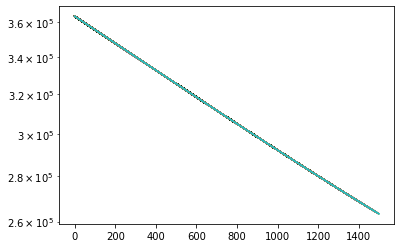

In [6]:
def train_model(model, optim, loss_f, epochs, DEBUG=True):
    loss_history = []

    for epoch in range(epochs):
        optim.zero_grad()
        model.train()

        y_pred = model.forward(torch.FloatTensor(x_train.values))[:,0]
        loss = loss_f(y_pred, torch.FloatTensor(y_train))
        loss.backward()
        optim.step()
        
        if DEBUG:
            loss_history.append(math.sqrt(loss.item()))
            plt.yscale('log')
            plt.plot(loss_history)
        
def test_model(model, loss_f):
    y_pred = model.forward(torch.FloatTensor(x_test.values))[:,0]
    loss = loss_f(y_pred, torch.FloatTensor(y_test))
    return round(math.sqrt(loss.item()), 2)

def train_test_model(model, a_func, optim, loss_f = F.mse_loss, epochs=1500, DEBUG=True):
    train_model(model, optim, loss_f, epochs, DEBUG)
    
    optim_name = optim.__class__.__name__
    activation_name = a_func().__class__.__name__
    if 'momentum' in optim.defaults:
        if optim.defaults['momentum']:
            optim_name += '_momentum'
    model_params = activation_name + '+' + optim_name
    result = {model_params: test_model(model, loss_f)}
    
    if DEBUG:
        print(result)
    return test_model(model, loss_f)

# Sigmoid, Tanh, ReLU, ELU
activation_func = nn.ReLU

# SGD, SGD with momentum, RMSprop, Adam
optimization_alg = torch.optim.Adam

results_list13 = []
model = create_model(layers_amount=1, a_func=activation_func)
results_list13.append(train_test_model(model, activation_func, optimization_alg(params=model.parameters())))

{'ReLU+Adam': 136619.96}


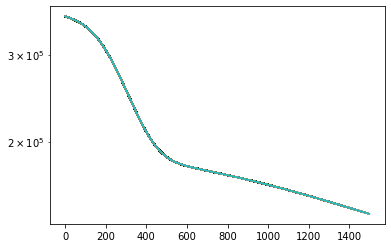

In [7]:
model = create_model(layers_amount=2, a_func=activation_func())
results_list13.append(train_test_model(model, activation_func, optimization_alg(params=model.parameters())))

{'ReLU+Adam': 108587.83}


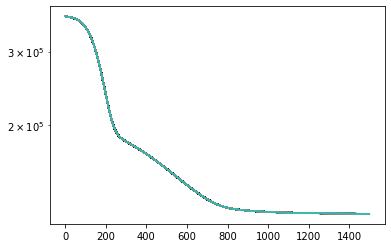

In [8]:
model = create_model(layers_amount=3, a_func=activation_func())
results_list13.append(train_test_model(model, activation_func, optimization_alg(params=model.parameters())))

{'ReLU+Adam': 108506.72}


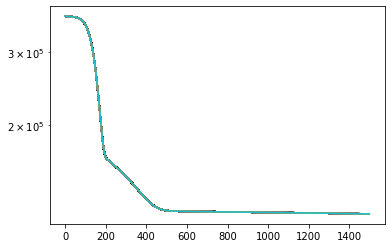

In [9]:
model = create_model(layers_amount=4, a_func=activation_func())
results_list13.append(train_test_model(model, activation_func, optimization_alg(params=model.parameters())))

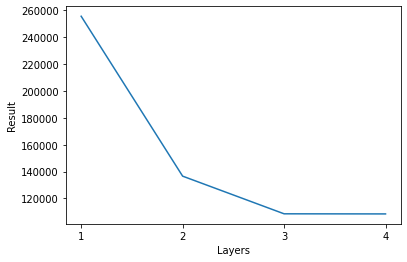

108506.72


In [10]:
layers = ['1','2','3','4']
plt.plot(layers, results_list13)
plt.xlabel('Layers')
plt.ylabel('Result')
plt.show()

print(min(results_list13))

## 1.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации: sigmoid, tanh, ReLU, ELU. 

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

{'ReLU+Adam': 351108.6}


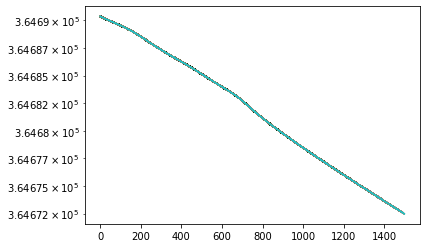

In [11]:
results_list14 = []
model = create_model(layers_amount=4, a_func=nn.Sigmoid())
results_list14.append(train_test_model(model, activation_func, optimization_alg(params=model.parameters())))

{'ReLU+Adam': 351106.93}


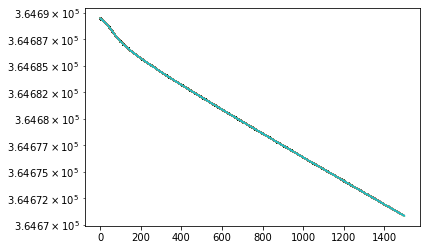

In [12]:
model = create_model(layers_amount=4, a_func=nn.Tanh())
results_list14.append(train_test_model(model, activation_func, optimization_alg(params=model.parameters())))

{'ReLU+Adam': 108288.93}


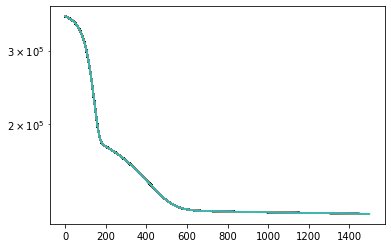

In [13]:
model = create_model(layers_amount=4, a_func=nn.ReLU())
results_list14.append(train_test_model(model, activation_func, optimization_alg(params=model.parameters())))

{'ReLU+Adam': 109178.6}


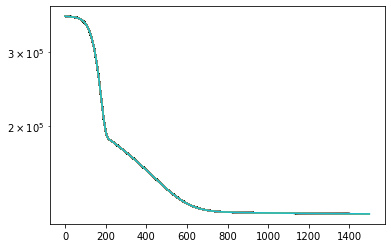

In [14]:
model = create_model(layers_amount=4, a_func=nn.ELU())
results_list14.append(train_test_model(model, activation_func, optimization_alg(params=model.parameters())))

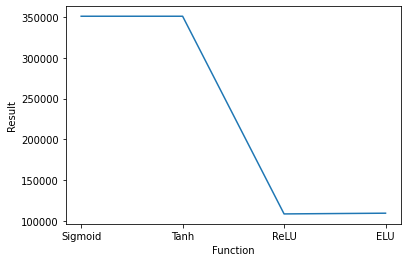

108288.93


In [15]:
functions = ['Sigmoid','Tanh','ReLU','ELU']
plt.plot(functions, results_list14)
plt.xlabel('Function')
plt.ylabel('Result')
plt.show()

print(min(results_list14))

## 1.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

{'ReLU+SGD': nan}


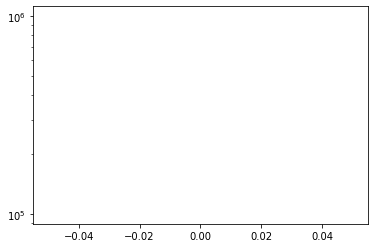

In [16]:
results_list15 = []
activation_func = nn.ReLU
model = create_model(layers_amount=4, a_func=activation_func())
results_list15.append(train_test_model(model, activation_func, torch.optim.SGD(params=model.parameters(), lr=0.1)))

{'ReLU+SGD_momentum': nan}


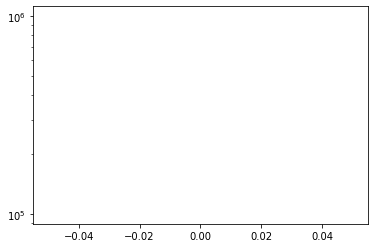

In [17]:
model = create_model(layers_amount=4, a_func=activation_func())
results_list15.append(train_test_model(model, activation_func, torch.optim.SGD(params=model.parameters(), lr=0.1, momentum=0.4)))

{'ReLU+RMSprop': 108754.27}


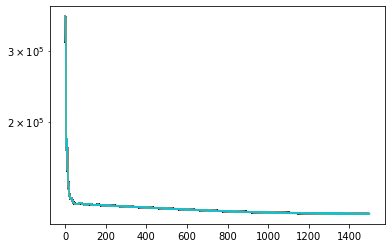

In [18]:
model = create_model(layers_amount=4, a_func=activation_func())
results_list15.append(train_test_model(model, activation_func, torch.optim.RMSprop(params=model.parameters())))

{'ReLU+Adam': 107160.36}


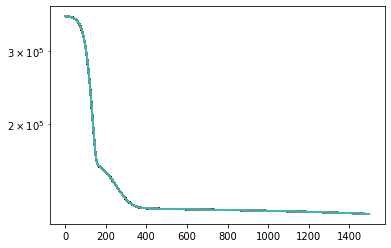

In [19]:
model = create_model(layers_amount=4, a_func=activation_func())
results_list15.append(train_test_model(model, activation_func, torch.optim.Adam(params=model.parameters())))

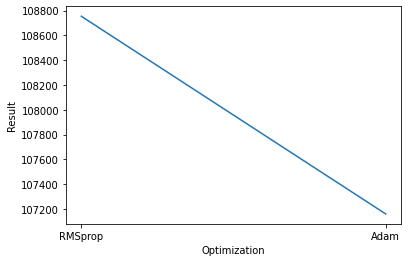

nan


In [20]:
optimizations = ['SGD','SGD momentum','RMSprop','Adam']
plt.plot(optimizations, results_list15)
plt.xlabel('Optimization')
plt.ylabel('Result')
plt.show()

print(min(results_list15))

## 1.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

{'ELU+RMSprop': 346061.96}


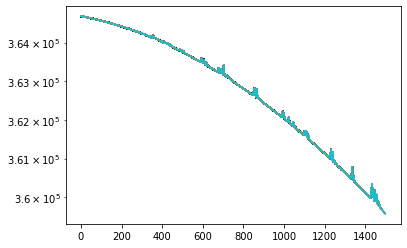

In [21]:
# Sigmoid, Tanh, ReLU, ELU
activation_func = nn.ELU

# SGD, SGD with momentum, RMSprop, Adam
optimization_alg = torch.optim.RMSprop

results_list16 = []

model = create_model(layers_amount=4, a_func=activation_func(), batch_norm=True, dropout=0)
results_list16.append(train_test_model(model, activation_func, optimization_alg(params=model.parameters())))

{'ELU+RMSprop': 132302.21}


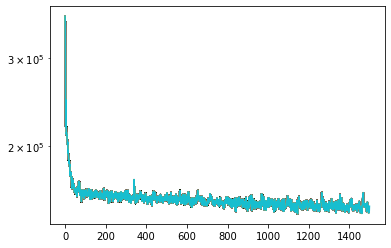

In [22]:
model = create_model(layers_amount=4, a_func=activation_func(), dropout=0.2)
results_list16.append(train_test_model(model, activation_func, optimization_alg(params=model.parameters())))

{'ELU+RMSprop': 201913.72}


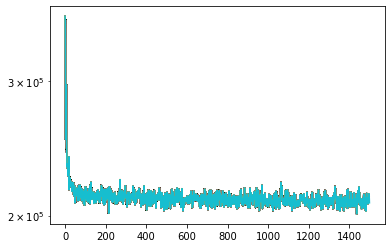

In [23]:
model = create_model(layers_amount=4, a_func=activation_func(), dropout=0.5)
results_list16.append(train_test_model(model, activation_func, optimization_alg(params=model.parameters())))

{'ELU+RMSprop': 346066.72}


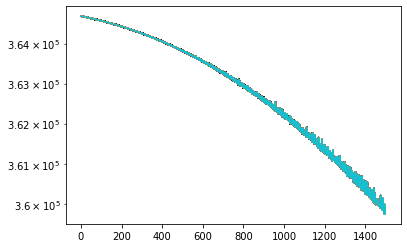

In [24]:
model = create_model(layers_amount=4, a_func=activation_func(), batch_norm=True, dropout=0.2)
results_list16.append(train_test_model(model, activation_func, optimization_alg(params=model.parameters())))

{'ELU+RMSprop': 346521.8}


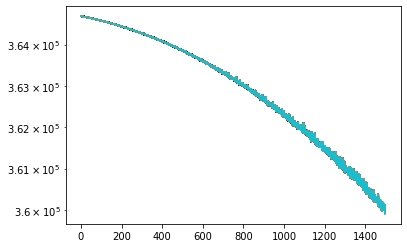

In [25]:
model = create_model(layers_amount=4, a_func=activation_func(), batch_norm=True, dropout=0.5)
results_list16.append(train_test_model(model, activation_func, optimization_alg(params=model.parameters())))

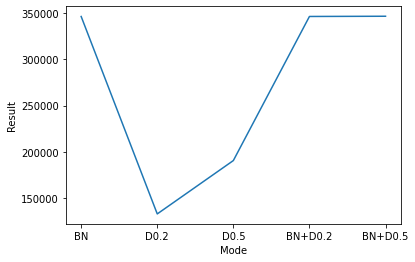

133104.78


In [26]:
modes = ['BN','D0.2', 'D0.5', 'BN+D0.2','BN+D0.5']
plt.plot(modes, results_list16)
plt.xlabel('Mode')
plt.ylabel('Result')
plt.show()

print(min(results_list16))

## 1.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

{'ELU+Adam': 108977.94}


108977.94

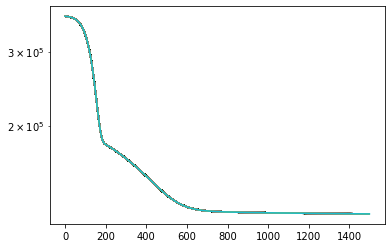

In [27]:
model = create_model(layers_amount=4, a_func=nn.ReLU())
train_test_model(model, activation_func, torch.optim.Adam(params=model.parameters()))

## 1.8 Выводы

Лучший результат обучения был получен при следующей конфигурации нейронной сети: - функция активации: ReLU - алгоритм оптимизации: Adam

# 2. Искусственная неронная сеть для решения задачи классификации (9 баллов)

## 2.1 Загрузка данных



In [28]:
data = pd.read_csv('./data/spam.csv', usecols=['v1','v2'], encoding='latin-1')
data = data.rename(columns = {'v1': 'type', 'v2': 'text'})
print(f'Row count is: {len(data.axes[0])}')
data.head()

Row count is: 5572


,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2.2 Преодбработка/нормализация данных

In [29]:
data.type = data.type.factorize()[0]
data.drop_duplicates(inplace=True)
data.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
# Поскольку в СПАМ-сообщениях зачастую содержится много текста с верхним регистром или различных спец. символов - это может пригодиться при обучении моделей
# Посчитаем колличество букв с верхним регистром
def calc_upper_word(text):
    res = re.findall('[A-Z]', text)
    return res.__len__()

# Посчитаем колличество специальных символов и знаков препинания
def calc_punctuation(text):
    res = re.findall(fr"[{re.escape(string.punctuation)}]", text)
    return res.__len__()

# Дополнительно подсчитаем количество цифр в сообщении
def calc_numbers(text):
    res = re.findall('[\d]', text)
    return res.__len__()

# Дополнительно подсчитаем количество стоп-слов в сообщении
def calc_stopwords(text):
    counter = 0
    for word in text.split():
        if word in stop:
            counter += 1
    return counter

# Запишем это число как новые параметры в таблице
data['upper_words_amount'] = data['text'].apply(calc_upper_word)
data['punctuation_amount'] = data['text'].apply(calc_punctuation)
data['numbers_amount'] = data['text'].apply(calc_numbers)
data['stopwords_amount'] = data['text'].apply(calc_stopwords)
data.head()

,type,text,upper_words_amount,punctuation_amount,numbers_amount,stopwords_amount
0,0,"Go until jurong point, crazy.. Available only ...",3,9,0,4
1,0,Ok lar... Joking wif u oni...,2,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,10,6,25,5
3,0,U dun say so early hor... U c already then say...,2,6,0,3
4,0,"Nah I don't think he goes to usf, he lives aro...",2,2,0,6


In [31]:
# Удалим стоп-слова, которые не несут информации, а также все числа. В дальнейшем это более точно поможет подсчитать информативные слова
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data['text'] = data['text'].apply(lambda x: ''.join([word for word in x if not word.isdigit()]))
data.head()

,type,text,upper_words_amount,punctuation_amount,numbers_amount,stopwords_amount
0,0,"Go jurong point, crazy.. Available bugis n gre...",3,9,0,4
1,0,Ok lar... Joking wif u oni...,2,6,0,0
2,1,Free entry wkly comp win FA Cup final tkts st...,10,6,25,5
3,0,U dun say early hor... U c say...,2,6,0,3
4,0,"Nah I don't think goes usf, lives",2,2,0,6


In [32]:
# Также добавим новые параметры для понимания структуры сообщения (длина сообщения, кол-во слов, кол-во предложений)
data['length'] = data['text'].apply(len)
data['words_amount'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
data['sentences_amount'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head()

,type,text,upper_words_amount,punctuation_amount,numbers_amount,stopwords_amount,length,words_amount,sentences_amount
0,0,"Go jurong point, crazy.. Available bugis n gre...",3,9,0,4,91,20,2
1,0,Ok lar... Joking wif u oni...,2,6,0,0,29,8,2
2,1,Free entry wkly comp win FA Cup final tkts st...,10,6,25,5,116,29,2
3,0,U dun say early hor... U c say...,2,6,0,3,33,10,1
4,0,"Nah I don't think goes usf, lives",2,2,0,6,33,9,1


## 2.3 Деление на train и test

In [33]:
types = data['type']
features = data.drop(columns=['type', 'text'])
x_train, x_test, y_train, y_test = train_test_split(features, types, test_size=0.2, random_state=12)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
x_train.head()

(4135, 7) (4135,) (1034, 7) (1034,)


,upper_words_amount,punctuation_amount,numbers_amount,stopwords_amount,length,words_amount,sentences_amount
4288,1,4,0,2,27,8,1
5045,4,5,1,3,79,18,4
2132,14,7,17,5,99,19,4
676,3,4,0,7,51,12,3
816,2,4,0,11,66,16,2


## 2.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=логистическая регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [34]:
def train_model2(model, optim, loss_f, epochs):
    loss_history = []
    loss_history_test = []
    acc_his = []
    acc_his_test = []
    for epoch in range(epochs):
        optim.zero_grad()
        model.train()

        y_pred_test = model.forward(torch.FloatTensor(x_test.values))
        loss_history_test.append(loss_f(y_pred_test, torch.LongTensor(y_test.values)).item())
        acc_his_test.append(accuracy_score(y_test, np.argmax(y_pred_test.detach().numpy(), axis=1)))
        
        y_pred = model.forward(torch.FloatTensor(x_train.values))
        loss = loss_f(y_pred, torch.LongTensor(y_train.values))
        acc_his.append(accuracy_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1)))

        loss.backward()
        optim.step()

        loss_history.append(loss.item())

    plt.plot(loss_history)
    plt.plot(loss_history_test)
    plt.yscale('log')
    plt.show()

    plt.plot(acc_his_test)
    plt.yscale('log')
    plt.show()

def test_model2(model, loss_f):
    y_pred = model.forward(torch.FloatTensor(x_test.values))
    loss = loss_f(y_pred, torch.LongTensor(y_test.values))
    
    y_pred_res = np.argmax(y_pred.detach().numpy(), axis=1)
    score = round(f1_score(y_test, y_pred_res, average='macro'), 4)
    print(classification_report(y_test, y_pred_res, zero_division=0))
    print('f1_score: ', score)
    return score

def train_test_model2(model, optim, loss_f = F.nll_loss, epochs=1500):
    train_model2(model, optim, loss_f, epochs)
    return test_model2(model, loss_f)

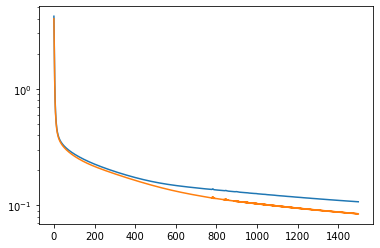

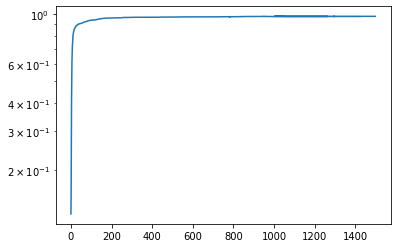

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       908
           1       0.96      0.87      0.91       126

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034

f1_score:  0.9481


In [35]:
# Sigmoid, Tanh, ReLU, ELU
activation_func = nn.ELU

# SGD, SGD with momentum, RMSprop, Adam
optimization_alg = torch.optim.RMSprop

lr = 0.001
torch.manual_seed(22)
results_list23 = []

model = create_model(layers_amount=1, a_func=activation_func(), in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
results_list23.append(train_test_model2(model, optimization_alg(model.parameters(), lr=lr)))

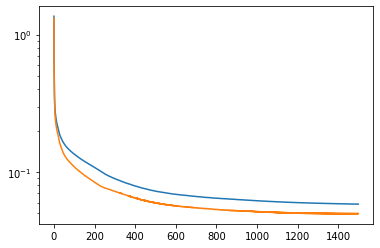

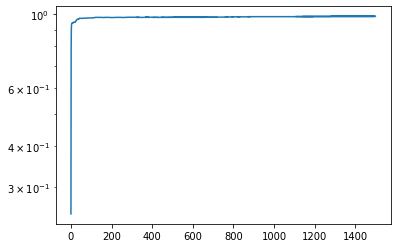

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       908
           1       0.99      0.90      0.94       126

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034

f1_score:  0.967


In [36]:
model = create_model(layers_amount=2, a_func=activation_func(), in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
results_list23.append(train_test_model2(model, optimization_alg(model.parameters(), lr=lr)))

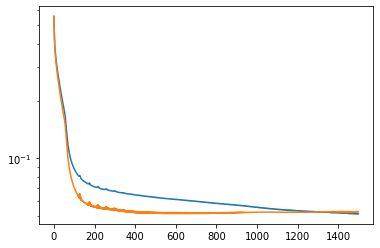

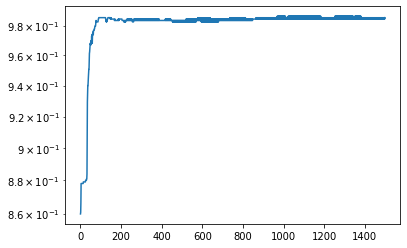

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       908
           1       0.98      0.89      0.93       126

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

f1_score:  0.9623


In [37]:
model = create_model(layers_amount=3, a_func=activation_func(), in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
results_list23.append(train_test_model2(model, optimization_alg(model.parameters(), lr=lr)))

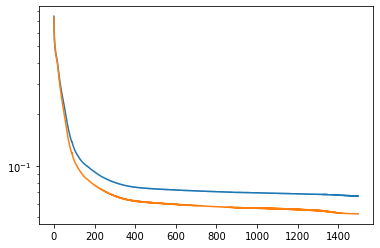

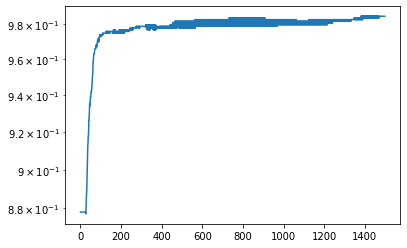

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       908
           1       0.97      0.90      0.93       126

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

f1_score:  0.9626


In [38]:
model = create_model(layers_amount=4, a_func=activation_func(), in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
results_list23.append(train_test_model2(model, optimization_alg(model.parameters(), lr=lr)))

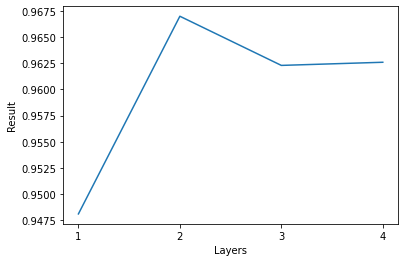

0.967


In [39]:
layers = ['1','2','3','4']
plt.plot(layers, results_list23)
plt.xlabel('Layers')
plt.ylabel('Result')
plt.show()

print(max(results_list23))

## 2.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации на промежуточных слоях: sigmoid, tanh, ReLU, ELU. На выходном слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

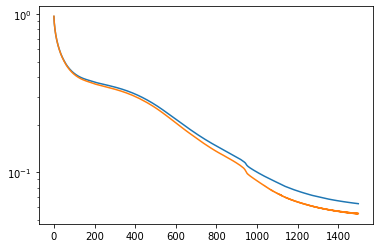

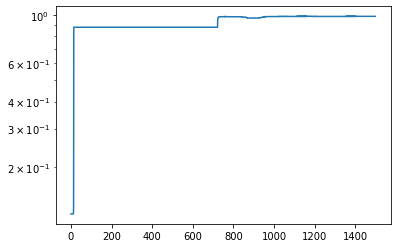

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       908
           1       0.95      0.92      0.94       126

    accuracy                           0.98      1034
   macro avg       0.97      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034

f1_score:  0.9633


In [40]:
results_list24 = []
model = create_model(layers_amount=4, a_func=nn.Sigmoid(), in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
results_list24.append(train_test_model2(model, optimization_alg(model.parameters(), lr=lr)))

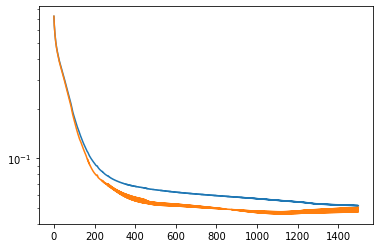

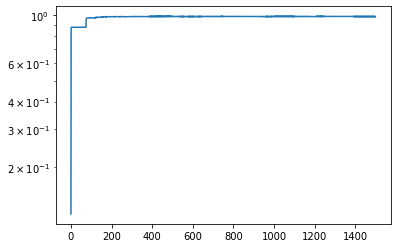

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       908
           1       0.96      0.92      0.94       126

    accuracy                           0.99      1034
   macro avg       0.97      0.96      0.97      1034
weighted avg       0.99      0.99      0.99      1034

f1_score:  0.9655


In [41]:
model = create_model(layers_amount=4, a_func=nn.Tanh(), in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
results_list24.append(train_test_model2(model, optimization_alg(model.parameters(), lr=lr)))

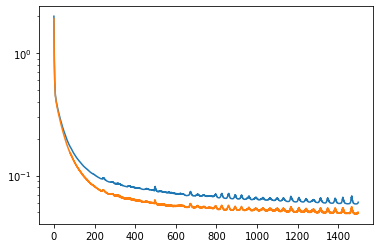

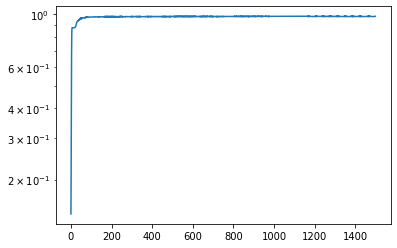

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       908
           1       0.93      0.89      0.91       126

    accuracy                           0.98      1034
   macro avg       0.96      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034

f1_score:  0.9492


In [42]:
model = create_model(layers_amount=4, a_func=nn.ReLU(), in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
results_list24.append(train_test_model2(model, optimization_alg(model.parameters(), lr=lr)))

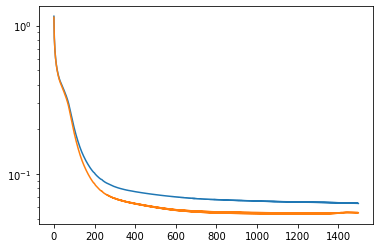

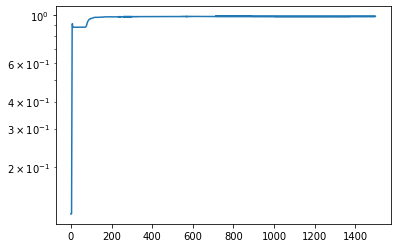

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       908
           1       0.97      0.89      0.93       126

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

f1_score:  0.9579


In [43]:
model = create_model(layers_amount=4, a_func=nn.ELU(), in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
results_list24.append(train_test_model2(model, optimization_alg(model.parameters(), lr=lr)))

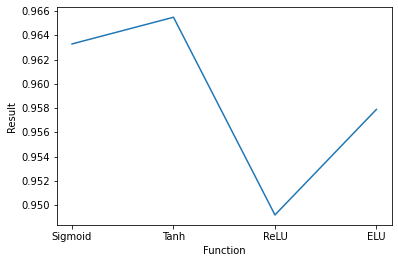

0.9655


In [44]:
functions = ['Sigmoid','Tanh','ReLU','ELU']
plt.plot(functions, results_list24)
plt.xlabel('Function')
plt.ylabel('Result')
plt.show()

print(max(results_list24))

## 2.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

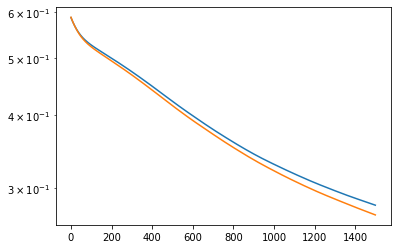

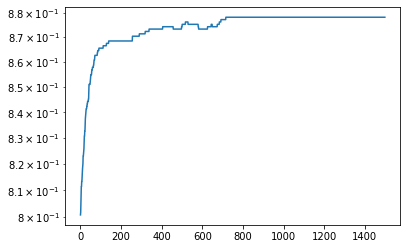

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       908
           1       0.00      0.00      0.00       126

    accuracy                           0.88      1034
   macro avg       0.44      0.50      0.47      1034
weighted avg       0.77      0.88      0.82      1034

f1_score:  0.4676


In [45]:
results_list25 = []
activation_func = nn.ReLU
model = create_model(layers_amount=4, a_func=activation_func(), in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
results_list25.append(train_test_model2(model, torch.optim.SGD(params=model.parameters(), lr=lr)))

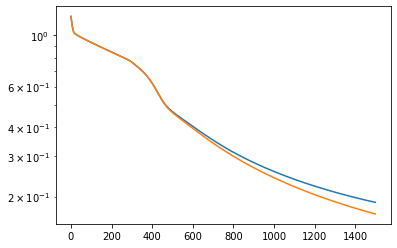

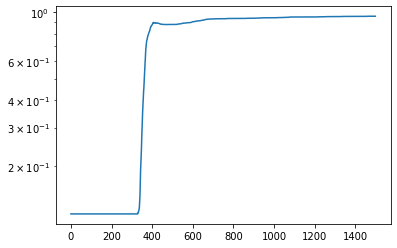

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       908
           1       0.84      0.81      0.83       126

    accuracy                           0.96      1034
   macro avg       0.91      0.89      0.90      1034
weighted avg       0.96      0.96      0.96      1034

f1_score:  0.9011


In [46]:
model = create_model(layers_amount=4, a_func=activation_func(), in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
results_list25.append(train_test_model2(model, torch.optim.SGD(params=model.parameters(), lr=lr, momentum=0.4)))

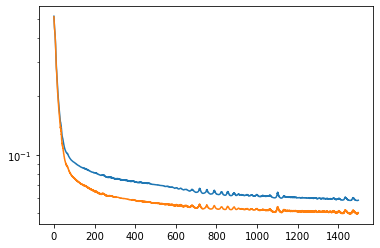

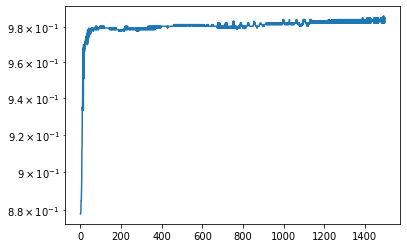

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       908
           1       0.97      0.88      0.93       126

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

f1_score:  0.9576


In [47]:
model = create_model(layers_amount=4, a_func=activation_func(), in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
results_list25.append(train_test_model2(model, torch.optim.RMSprop(params=model.parameters(), lr=lr)))

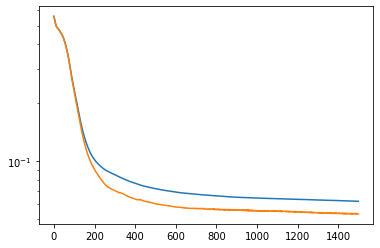

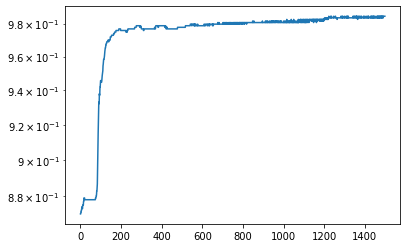

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       908
           1       0.97      0.90      0.94       126

    accuracy                           0.99      1034
   macro avg       0.98      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034

f1_score:  0.965


In [48]:
model = create_model(layers_amount=4, a_func=activation_func(), in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
results_list25.append(train_test_model2(model, torch.optim.Adam(params=model.parameters(), lr=lr)))

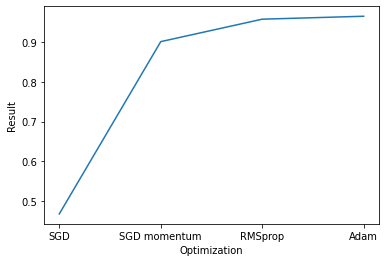

0.965


In [49]:
optimizations = ['SGD','SGD momentum','RMSprop','Adam']
plt.plot(optimizations, results_list25)
plt.xlabel('Optimization')
plt.ylabel('Result')
plt.show()

print(max(results_list25))

## 2.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

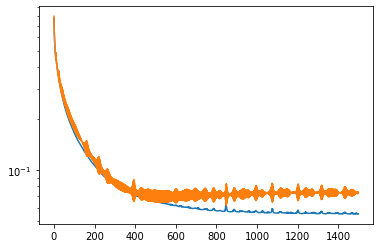

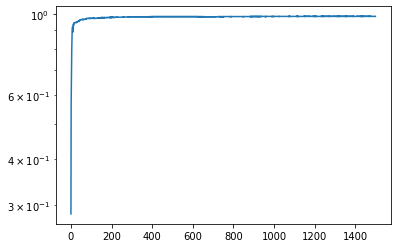

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       908
           1       0.99      0.88      0.93       126

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

f1_score:  0.962


In [50]:
# Sigmoid, Tanh, ReLU, ELU
activation_func = nn.ELU

# SGD, SGD with momentum, RMSprop, Adam
optimization_alg = torch.optim.RMSprop

results_list26 = []

model = create_model(layers_amount=4, a_func=activation_func(), batch_norm=True, dropout=0, in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
results_list26.append(train_test_model2(model, optimization_alg(params=model.parameters(), lr=lr)))

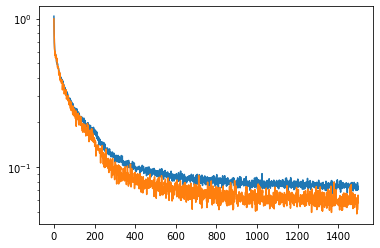

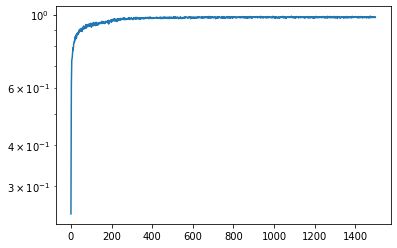

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       908
           1       0.96      0.91      0.93       126

    accuracy                           0.98      1034
   macro avg       0.97      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

f1_score:  0.9631


In [51]:
model = create_model(layers_amount=4, a_func=activation_func(), dropout=0.2, in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
results_list26.append(train_test_model2(model, optimization_alg(params=model.parameters(), lr=lr)))

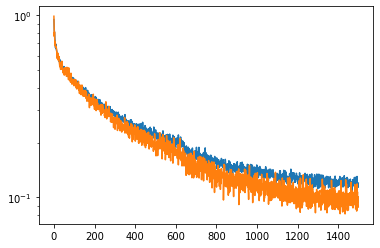

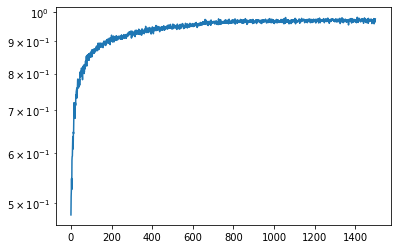

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       908
           1       0.95      0.77      0.85       126

    accuracy                           0.97      1034
   macro avg       0.96      0.88      0.92      1034
weighted avg       0.97      0.97      0.97      1034

f1_score:  0.9162


In [52]:
model = create_model(layers_amount=4, a_func=activation_func(), dropout=0.5, in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
results_list26.append(train_test_model2(model, optimization_alg(params=model.parameters(), lr=lr)))

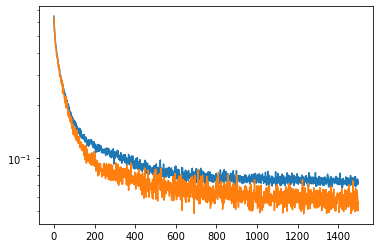

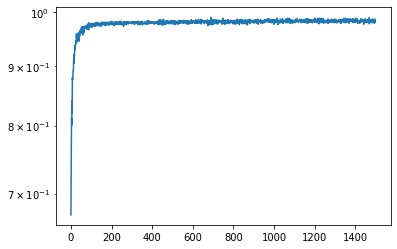

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       908
           1       0.98      0.90      0.94       126

    accuracy                           0.99      1034
   macro avg       0.98      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034

f1_score:  0.9672


In [53]:
model = create_model(layers_amount=4, a_func=activation_func(), batch_norm=True, dropout=0.2, in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
results_list26.append(train_test_model2(model, optimization_alg(params=model.parameters(), lr=lr)))

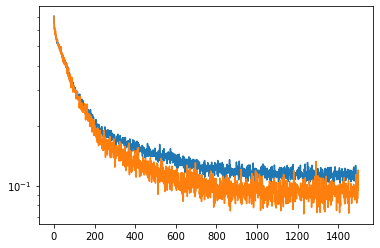

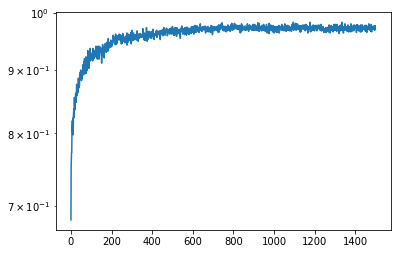

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       908
           1       0.96      0.82      0.88       126

    accuracy                           0.97      1034
   macro avg       0.97      0.91      0.93      1034
weighted avg       0.97      0.97      0.97      1034

f1_score:  0.9347


In [54]:
model = create_model(layers_amount=4, a_func=activation_func(), batch_norm=True, dropout=0.5, in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
results_list26.append(train_test_model2(model, optimization_alg(params=model.parameters(), lr=lr)))

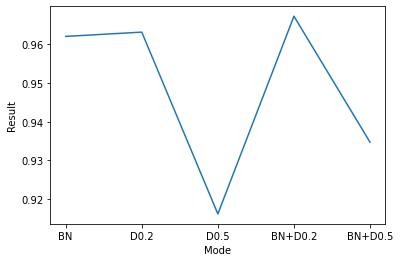

0.9672


In [55]:
modes = ['BN','D0.2', 'D0.5', 'BN+D0.2','BN+D0.5']
plt.plot(modes, results_list26)
plt.xlabel('Mode')
plt.ylabel('Result')
plt.show()

print(max(results_list26))

## 2.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

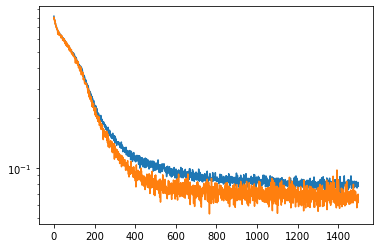

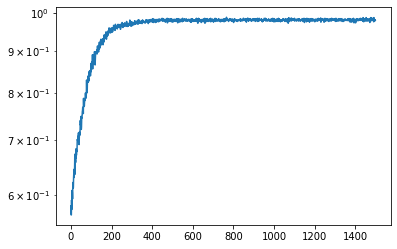

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       908
           1       0.94      0.90      0.92       126

    accuracy                           0.98      1034
   macro avg       0.96      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034

f1_score:  0.9539


0.9539

In [58]:
model = create_model(layers_amount=4, a_func=nn.ELU(), batch_norm=True, dropout=0.2, in_amount=7, out_amount=2)
model.add_module('layer_s', nn.LogSoftmax(dim=1))
train_test_model2(model, torch.optim.Adam(params=model.parameters(), lr=lr))

## 2.8 Выводы

Лучший результат обучения был получен при следующей конфигурации нейронной сети:
    - функция активации: ReLU
    - алгоритм оптимизации: Adam
    - BatchNorm
    - Dropout 0.2